In [142]:
# Make the following code support python2 and python3
from __future__ import division, print_function, unicode_literals

# Check whether Python version is 3.5 or above
import sys
assert sys.version_info >= (3, 5)

# Check whether the version of sklearn is 0.20 or above
import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os 

# After each run, you get the same result as the notebook
np.random.seed(42) 

# Make Matplotlib plot better
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Set the way to save pictures
PROJECT_ROOT_DIR = "."
IMAGE_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGE_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True):
    '''
    Save picture automatically
    
    :param fig_id: picture_name
    '''
    path = os.path.join(PROJECT_ROOT_DIR, "images", fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
    
# Ignore useless warnings (Scipy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", category=FutureWarning, module='sklearn',  lineno=196)

In [143]:
# Read data
raw_data = pd.read_excel("hydrogen_test_classification.xlsx")

In [144]:
# Separate features and labels
X = raw_data.drop("TRUE VALUE", axis=1).copy()
y = raw_data["TRUE VALUE"]

In [145]:
# Check for null values
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358 entries, 0 to 2357
Data columns (total 25 columns):
SIO2(WT%)     2358 non-null float64
TIO2(WT%)     2358 non-null float64
AL2O3(WT%)    2358 non-null float64
CR2O3(WT%)    2358 non-null float64
FEOT(WT%)     2358 non-null float64
CAO(WT%)      2358 non-null float64
MGO(WT%)      2358 non-null float64
MNO(WT%)      2358 non-null float64
NA2O(WT%)     2358 non-null float64
SR(PPB)       2358 non-null float64
Y(PPB)        2358 non-null float64
ZR(PPB)       2358 non-null float64
NB(PPB)       2358 non-null float64
LA(PPB)       2358 non-null float64
CE(PPB)       2358 non-null float64
PR(PPB)       2358 non-null float64
ND(PPB)       2358 non-null float64
SM(PPB)       2358 non-null float64
EU(PPB)       2358 non-null float64
GD(PPB)       2358 non-null float64
DY(PPB)       2358 non-null float64
ER(PPB)       2358 non-null float64
YB(PPB)       2358 non-null float64
LU(PPB)       2358 non-null float64
TH(PPB)       2358 non-null f

In [146]:
# number of null values
X.isnull().sum()

SIO2(WT%)     0
TIO2(WT%)     0
AL2O3(WT%)    0
CR2O3(WT%)    0
FEOT(WT%)     0
CAO(WT%)      0
MGO(WT%)      0
MNO(WT%)      0
NA2O(WT%)     0
SR(PPB)       0
Y(PPB)        0
ZR(PPB)       0
NB(PPB)       0
LA(PPB)       0
CE(PPB)       0
PR(PPB)       0
ND(PPB)       0
SM(PPB)       0
EU(PPB)       0
GD(PPB)       0
DY(PPB)       0
ER(PPB)       0
YB(PPB)       0
LU(PPB)       0
TH(PPB)       0
dtype: int64

In [147]:
'''
# If there is a null value, interpolation is required
X.fillna(0)
'''

'\n# If there is a null value, interpolation is required\nX.fillna(0)\n'

Saving figure X_reduced_plot


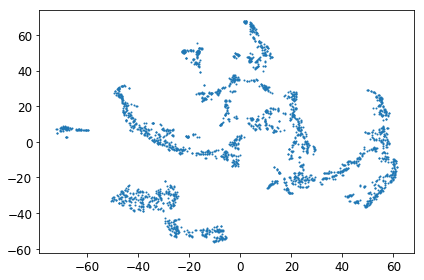

In [148]:
from sklearn.manifold import TSNE

# Using TSNE to reduce dimension to 2-D
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s=1)
save_fig("X_reduced_plot")

In [149]:
# original dimension
X.shape

(2358, 25)

In [150]:
# Shape after dimension reduction
X_reduced.shape

(2358, 2)

In [151]:
from sklearn.mixture import GaussianMixture
from sklearn.base import clone

# To set the cluster center to 5 in advance, you need to Set Reg_ Covar value, which is 1e-6 by default, ensures that each element in the covariance matrix is positive
gm1 = GaussianMixture(n_components=5, n_init=10, reg_covar=1e-3, random_state=42)
# GM2 is trained with tsne data after dimensionality reduction, which is used to draw two-dimensional plane map later
gm2 = clone(gm1)
gm1.fit(X)
gm2.fit(X_reduced)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=10,
                precisions_init=None, random_state=42, reg_covar=0.001,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [152]:
def learned_parameters(estimator):
    """
    View the properties of the estimator
    
    :param estimator: 
    """
    return [attrib for attrib in dir(estimator)
            if attrib.endswith("_") and not attrib.startswith("_")]

In [153]:
# 
learned_parameters(gm1)

['converged_',
 'covariances_',
 'lower_bound_',
 'means_',
 'n_iter_',
 'precisions_',
 'precisions_cholesky_',
 'weights_']

In [154]:
gm1.weights_

array([2.14776461e-01, 4.24088210e-04, 8.48176421e-04, 8.58266590e-02,
       6.98124616e-01])

In [155]:
# Coordinates of each cluster in feature space
pd.DataFrame(gm1.means_)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,51.594658,0.693346,3.331696,0.176869,9.768272,20.359414,13.073051,0.363061,1.046051,8.583274e+03,...,27587.842191,147300.499828,46946.975603,3090.982255,50360.224031,52728.743110,28285.820639,33197.997256,5442.028736,2265.944441
1,49.250000,0.204700,0.484800,0.000000,24.810000,17.660000,6.150000,0.867900,0.217900,3.222601e+07,...,2733.669279,10529.765050,2207.208220,1124.647983,2249.918546,2573.594445,1487.328307,1130.263917,187.743190,177.495323
2,50.379000,0.381000,1.390500,0.000000,17.375000,18.854500,10.246500,0.544000,0.231500,7.523169e+06,...,119780.532960,524924.744825,108191.336458,30566.152589,102382.499121,76092.693809,46811.640731,59820.761105,10458.488745,118741.660954
3,52.335804,0.469265,2.854106,0.241985,10.852061,17.066560,13.334352,0.328031,2.264861,4.291538e+05,...,12015.254519,53135.000888,11118.289613,2458.872290,8873.584721,5889.723871,2598.957164,3104.578927,28125.346399,19627.303539
4,51.631130,0.667387,3.912916,0.299747,7.010730,20.511556,14.440623,0.217069,1.082234,1.592459e+05,...,2110.887593,10907.774477,2911.758506,941.080911,2886.168032,2410.991135,1182.440813,1143.786930,186.916380,227.256072


In [156]:
# Covariance matrix formed by characteristic dimension of X
gm1.covariances_

array([[[ 8.74821370e+00, -2.19767669e+00, -2.41482218e+00, ...,
          1.28193454e+03,  2.16080300e+03,  2.61339157e+03],
        [-2.19767669e+00,  9.20352019e-01,  1.63196970e+00, ...,
         -3.34602233e+02, -9.40395483e+02, -1.12482543e+03],
        [-2.41482218e+00,  1.63196970e+00,  9.89893899e+00, ...,
         -8.66673691e+03, -4.00415919e+03, -5.16153304e+03],
        ...,
        [ 1.28193454e+03, -3.34602233e+02, -8.66673691e+03, ...,
          1.28664780e+10,  7.64959307e+08,  1.01427400e+09],
        [ 2.16080300e+03, -9.40395483e+02, -4.00415919e+03, ...,
          7.64959307e+08,  1.11361500e+09,  1.44854776e+09],
        [ 2.61339157e+03, -1.12482543e+03, -5.16153304e+03, ...,
          1.01427400e+09,  1.44854776e+09,  1.88903241e+09]],

       [[ 1.00000000e-03,  4.73316543e-29,  1.12412679e-28, ...,
          2.66571877e-25,  4.54383881e-26,  4.24091623e-26],
        [ 4.73316543e-29,  1.00000000e-03,  4.68386162e-31, ...,
          1.11071615e-27,  1.89326617e

In [157]:
gm1.converged_

True

In [158]:
# Check the number of iterations of GM model to make EM algorithm converge
gm1.n_iter_

26

In [159]:
clustering_labels = gm1.predict(X)
clustering_labels

array([4, 4, 4, ..., 4, 4, 0])

In [160]:
np.unique(clustering_labels)

array([0, 1, 2, 3, 4])

([<matplotlib.axis.XTick at 0x1263dbd50>,
 <a list of 5 Text xticklabel objects>)

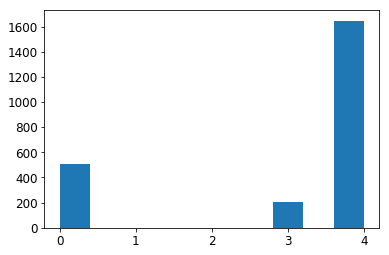

In [161]:
# The cylindrical coordinates represent the number of data points in each cluster
plt.hist(clustering_labels, align="mid")
plt.xticks(np.arange(len(np.unique(clustering_labels))))

In [162]:
# 每一个数据点被分到各类簇标签的概率
pd.DataFrame(gm1.predict_proba(X))

,0,1,2,3,4
0,0.000000e+00,0.0,0.0,5.164411e-15,1.000000e+00
1,1.104040e-139,0.0,0.0,5.411385e-19,1.000000e+00
2,9.475308e-111,0.0,0.0,2.721745e-12,1.000000e+00
3,1.119991e-58,0.0,0.0,4.609730e-18,1.000000e+00
4,2.363930e-22,0.0,0.0,3.566231e-18,1.000000e+00
5,1.806508e-48,0.0,0.0,1.000000e+00,2.203349e-09
6,0.000000e+00,0.0,0.0,7.299842e-15,1.000000e+00
7,0.000000e+00,0.0,0.0,1.000000e+00,4.236840e-15
8,1.203910e-239,0.0,0.0,6.807842e-20,1.000000e+00
9,1.000000e+00,0.0,0.0,8.383267e-270,0.000000e+00


In [163]:
# 根据训练好的模型（各高斯分布的参数固定），随机生成数据集(8 x 25)，以及对应的簇标签
X_new, y_new = gm1.sample(8)

/usr/local/lib/python3.7/site-packages/sklearn/mixture/base.py:427: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  for (mean, covariance, sample) in zip(


In [211]:
X_new

array([[ 4.88041757e+01,  9.93217589e-01,  1.89528775e+00,
        -1.83903929e-01,  2.06361874e+01,  1.73715750e+01,
         1.02073693e+01,  8.54502583e-01,  1.79143689e-01,
        -5.97047939e+03,  2.53886781e+05, -3.26992670e+04,
        -3.74351640e+03,  2.43622721e+04,  9.63916446e+04,
         1.71238585e+04,  8.92165166e+04,  3.44400774e+04,
        -1.28732476e+04,  4.57408129e+04,  5.52413846e+04,
         1.85568149e+04,  5.08117379e+04, -1.12167481e+04,
        -2.08965666e+04],
       [ 5.46281630e+01,  1.73682138e-03,  4.91110047e+00,
         2.58958131e-01,  3.09614563e+00,  2.09599552e+01,
         1.23114548e+01,  4.10281760e-01,  1.24945828e+00,
         2.20524584e+06,  5.17245115e+04,  1.09763432e+06,
         4.17065798e+05,  1.69737269e+05,  3.09238238e+05,
         3.02471695e+04,  9.56533080e+04,  1.20146473e+04,
         5.78746009e+03,  1.13404459e+04,  9.21183425e+03,
         5.38813763e+03,  5.27309776e+03, -1.07256153e+05,
        -4.61143194e+04],
    

In [218]:
gm1.score_samples?
a = np.array([i for i in range(25)]).reshape(1, -1)
gm1.predict(a)
gm1.score_samples(a)

array([-3444.58871202])

In [165]:
# According to the logarithmic probability density function, the logarithmic probability density of each data point is calculated
gm1.score_samples(X)

array([-150.89416013, -141.91414933, -158.63406189, ..., -149.6785834 ,
       -137.64994417, -165.58887575])

In [166]:
densities_gm1 = gm1.score_samples(X)
# Set 4% of the data (in areas with low probability density) as outliers
density_threshold_gm1 = np.percentile(densities_gm1, 4)
anomalies_gm1 = X[densities_gm1 < density_threshold_gm1]

In [167]:
# Which values are outliers detected
anomalies_gm1

,SIO2(WT%),TIO2(WT%),AL2O3(WT%),CR2O3(WT%),FEOT(WT%),CAO(WT%),MGO(WT%),MNO(WT%),NA2O(WT%),SR(PPB),...,PR(PPB),ND(PPB),SM(PPB),EU(PPB),GD(PPB),DY(PPB),ER(PPB),YB(PPB),LU(PPB),TH(PPB)
48,53.620000,0.160000,1.700000,0.000100,5.180000,23.460000,14.470000,0.310000,0.920000,1.507220e+05,...,719.000000,4161.000000,1592.000000,644.000000,6644.000000,679.000000,905.000000,2.450000e+02,22.000000,16.000000
49,50.962732,0.446270,1.408836,0.000100,9.442463,22.944928,12.111430,1.316671,1.150181,3.515979e+03,...,29448.173660,157804.542600,52894.244010,1299.228358,59787.412990,68492.631650,36011.700900,3.236440e+04,4830.464149,870.495141
79,53.803970,0.000100,3.769518,0.344199,2.674230,22.764630,16.230760,0.000100,0.892547,2.455522e+03,...,43079.560550,216858.363300,54170.001300,6863.922665,40242.555260,22556.128200,7929.914278,6.839645e+03,1172.913911,144.245890
96,52.357611,0.093400,0.712451,0.003160,11.925081,20.666743,12.679237,0.527015,0.371722,8.775303e+05,...,15920.922870,51285.508450,7136.289125,1788.713737,4111.909611,2311.080431,1149.444361,1.529851e+03,284.415068,23525.960100
119,55.680000,0.340000,6.980000,0.170000,6.000000,14.470000,10.820000,0.000100,5.120000,3.895601e+04,...,485.275580,1931.604146,431.837434,132.908852,412.445064,565.094118,1464.639364,9.071685e+03,2550.911148,393.133793
153,49.903000,0.925000,4.728000,0.690000,6.639000,21.003000,15.322000,0.190000,0.327000,8.520000e+05,...,2830.000000,18400.000000,6413.000000,3410.000000,7760.000000,4860.000000,1240.000000,7.590000e+02,0.000000,0.000000
159,54.580000,0.270000,3.190000,0.100000,5.410000,18.460000,14.580000,0.000100,2.910000,6.986885e+05,...,38147.357370,125408.348300,19100.621430,5343.064850,14279.963040,12459.195070,8043.751629,1.026935e+04,1351.877519,6509.330433
170,55.526000,0.000100,0.889000,0.009000,1.428000,25.025000,16.950000,0.001000,0.310000,5.154417e+02,...,43195.035040,173779.314700,33936.800600,3435.140215,27012.653950,16678.845890,7357.391235,9.347275e+03,1732.313104,143.699799
208,49.298000,0.957000,3.778000,0.000000,11.040000,19.583000,13.801000,0.241000,0.265000,2.759700e+05,...,6990.000000,46780.000000,10700.000000,4250.000000,12600.000000,9210.000000,3610.000000,2.020000e+03,280.000000,120.000000
260,53.379145,0.298811,5.637597,0.762400,2.162340,21.798748,16.174226,0.065800,1.286523,3.310000e+04,...,17410.000000,82800.000000,27400.000000,1251.000000,23700.000000,33400.000000,25700.000000,5.150000e+04,8900.000000,1670.000000


In [168]:
# Bayesian score of the model
gm1.bic(X)

746805.8717377476

In [169]:
# AIC scorce
gm1.aic(X)

736693.0635695029

In [170]:
def bic_aic_plot(X, components_range=[1, 11], reg_covar=1e-3, covariance_type="full"):
    """
   As the number of cluster centers increases, BIC and AIC are plotted
    
    :param X: Dataset
    :param components_range: 
    :param reg_coar: The penalty term ensures that every value in the covariance matrix of GM model is positive
    """
    gms_per_k = [GaussianMixture(n_components=k, n_init=10, covariance_type=covariance_type,
                                 reg_covar=reg_covar, random_state=42).fit(X)
                 for k in range(components_range[0], components_range[1])]
    bics = [model.bic(X) for model in gms_per_k]
    aics = [model.aic(X) for model in gms_per_k]
    plt.figure(figsize=(8, 3))
    plt.plot(range(components_range[0], components_range[1]), bics, "bo-", label="BIC")
    plt.plot(range(components_range[0], components_range[1]), aics, "go--", label="AIC")
    plt.xlabel("$k$", fontsize=14)
    plt.ylabel("Information Criterion", fontsize=14)
    plt.axis([components_range[0], components_range[1]-0.5,
              np.min(aics) - 0.01*np.min(aics), np.max(bics) + 0.01*max(bics)])
    plt.legend()

Saving figure aic_bic_vs_k_plot


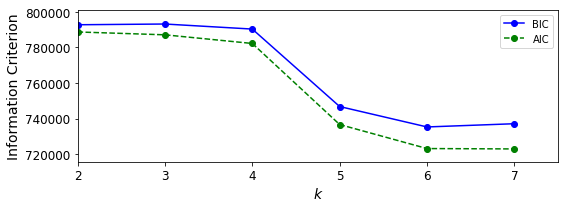

In [171]:
# Set the number range of cluster centers to 2~8
bic_aic_plot(X, components_range=[2, 8])
save_fig("aic_bic_vs_k_plot")
plt.show()

In [172]:
from matplotlib.colors import LogNorm

def plot_data(X):
    """
    
    :param X: Dataset
    """
    plt.plot(X[:, 0], X[:, 1], "k.", markersize=2)

def plot_centroids(centroids, weights=None, circle_color="w", cross_color="k"):
    """
    
    :param centroids: 
    :param weights: 
    :param circle_color: 
    :param cross_color: 
    """
    
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker="o", s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker="x", s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True,
                          show_xlabels=True, show_centroids=True, show_title=True):
    """
   Drawing two-dimensional effect picture of Gaussian mixture distribution model
    
    :param clusterer: 
    :param resolution: 
    :param show_ylabels: 
    :param show_xlabels: 
    :param show_centroids:
    :param show_title: 
    """
    mins = X.min(axis=0) - 0.5
    maxs = X.max(axis=0) + 0.5
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=50.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=50.0), 
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors="k")
    
    z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    plt.contour(xx, yy, z, linewidths=2,
                colors="r", linestyles="dashed")
    plot_data(X)
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    if show_centroids:
        plot_centroids(clusterer.means_, clusterer.weights_)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    if show_title:
        plt.title("covariance_type_plot={}".format(clusterer.covariance_type), fontsize=14)

Saving figure Gaussian_Mixture_full


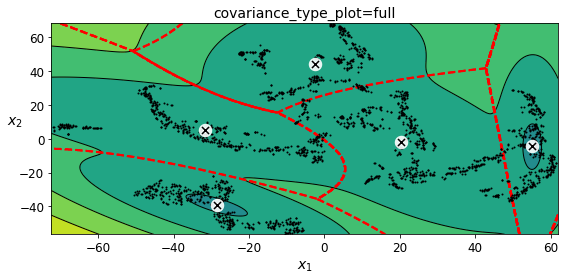

In [173]:
# 绘制使用降维的数据训练的GM模型（2维）
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm2, X_reduced)
save_fig("Gaussian_Mixture_full")

In [188]:
densities_gm2 = gm2.score_samples(X_reduced)
# 设置4%的数据（位于低概率密度的区域）为离群值
density_threshold_gm2 = np.percentile(densities_gm2, 4)
anomalies_gm2 = X_reduced[densities_gm2 < density_threshold_gm2]

Saving figure mixture_anomaly_detection_plot_full


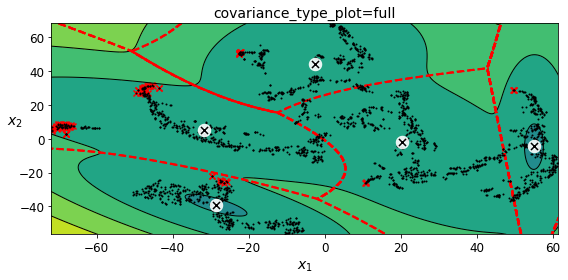

In [189]:
plt.figure(figsize=(8, 4))

# 含标注离群值的二维平面图
plot_gaussian_mixture(gm2, X_reduced)
plt.scatter(anomalies_gm2[:, 0], anomalies_gm2[:, 1], color="r", marker="x")
plt.xlim(X_reduced[:, 0].min(), X_reduced[:, 0].max())

save_fig("mixture_anomaly_detection_plot_full")
plt.show()

In [175]:
# 通过covariance_type可提前设置簇的形状及椭圆的长短轴方向
# 根据不同模型和数据集的需要，要设置reg_covar的值
gm_full = GaussianMixture(n_components=5, n_init=10, covariance_type="full",
                          reg_covar=1e-3, random_state=42)
gm_tied = GaussianMixture(n_components=5, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=5, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=5, n_init=10, covariance_type="diag")
gm_full.fit(X_reduced)
gm_tied.fit(X_reduced)
gm_spherical.fit(X_reduced)
gm_diag.fit(X_reduced)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

Saving figure GM_with_different_convariance_types


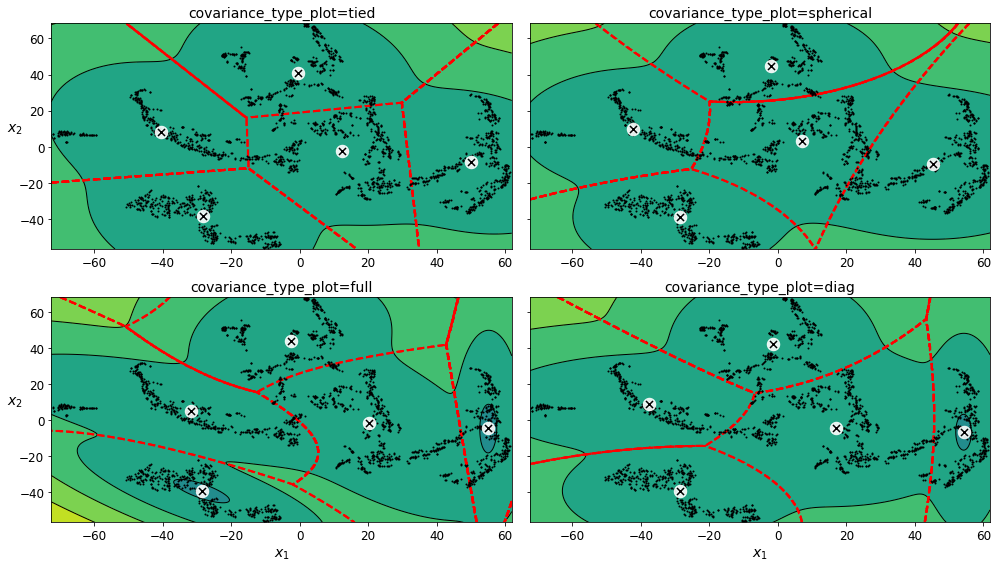

In [176]:
plt.figure(figsize=(14, 8))
plt.subplot(221)
plot_gaussian_mixture(gm_tied, X_reduced, show_xlabels=False)
plt.subplot(222)
plot_gaussian_mixture(gm_spherical, X_reduced, show_xlabels=False, show_ylabels=False)
plt.subplot(223)
plot_gaussian_mixture(gm_full, X_reduced)
plt.subplot(224)
plot_gaussian_mixture(gm_diag, X_reduced, show_ylabels=False)
save_fig("GM_with_different_convariance_types")
plt.show()

# 以sklearn自带的数据集进行分析

In [177]:
from sklearn.datasets import make_blobs

# 使用scikit-learn库自带的数据集，绘制GM模型的效果图，以便观察学习
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
demo_X = np.r_[X1, X2]
demo_y = np.r_[y1, y2]

In [178]:
from sklearn.mixture import GaussianMixture

# 用自带的数据集训练GM模型
gm3 = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm3.fit(demo_X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

Saving figure demo_gaussian_mixture_plot


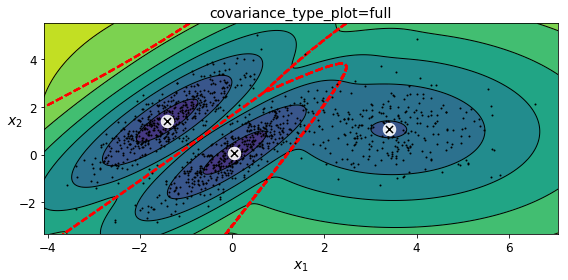

In [179]:
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm3, demo_X)
save_fig("demo_gaussian_mixture_plot")
plt.show()

In [180]:
gm_full_demo = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied_demo = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical_demo = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag_demo = GaussianMixture(n_components=3, n_init=10, covariance_type="diag")
gm_full_demo.fit(demo_X)
gm_tied_demo.fit(demo_X)
gm_spherical_demo.fit(demo_X)
gm_diag_demo.fit(demo_X)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

Saving figure demo_GM_with_different_convariance_types


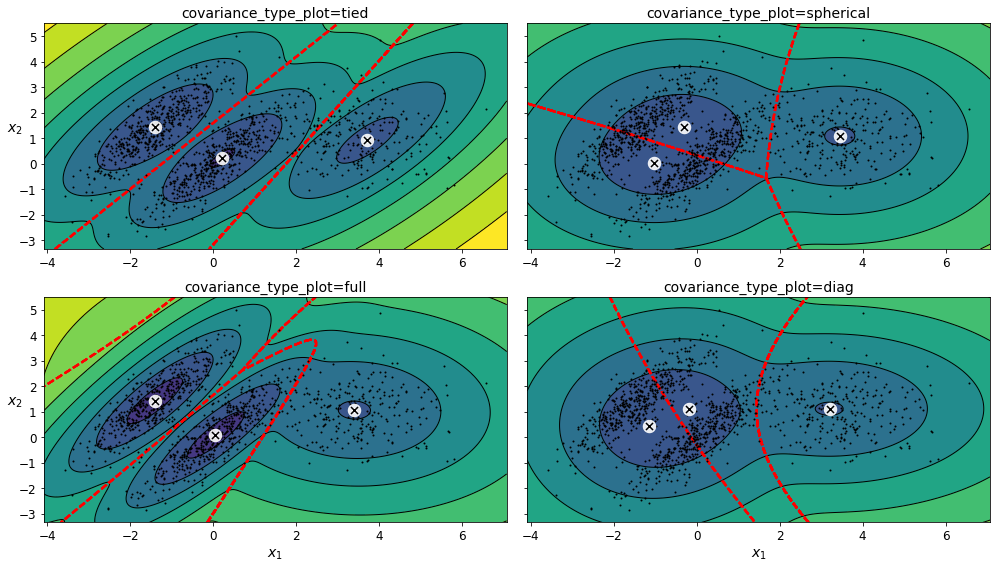

In [181]:
plt.figure(figsize=(14, 8))
plt.subplot(221)
plot_gaussian_mixture(gm_tied_demo, demo_X, show_xlabels=False)
plt.subplot(222)
plot_gaussian_mixture(gm_spherical_demo, demo_X, show_xlabels=False, show_ylabels=False)
plt.subplot(223)
plot_gaussian_mixture(gm_full_demo, demo_X)
plt.subplot(224)
plot_gaussian_mixture(gm_diag_demo, demo_X, show_ylabels=False)
save_fig("demo_GM_with_different_convariance_types")
plt.show()

In [182]:
densities_demo = gm3.score_samples(demo_X)
density_threshold_demo = np.percentile(densities_demo, 4)
anomalies_demo = demo_X[densities_demo < density_threshold_demo]

Saving figure mixture_anomaly_detection_plot_demo


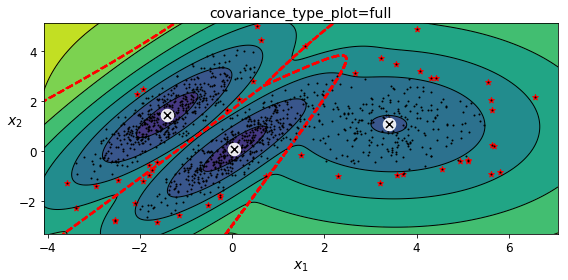

In [183]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm3, demo_X)
plt.scatter(anomalies_demo[:, 0], anomalies_demo[:, 1], color="r", marker="*")
plt.ylim(top=5.1)

save_fig("mixture_anomaly_detection_plot_demo")
plt.show()

In [184]:
gm3.bic(demo_X)

8189.74345832983

In [185]:
gm3.aic(demo_X)

8102.518178214792

Saving figure aic_bic_vs_k_plot_demo


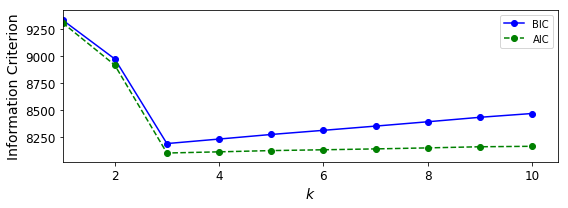

In [186]:
bic_aic_plot(demo_X)
save_fig("aic_bic_vs_k_plot_demo")
plt.show()